{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}


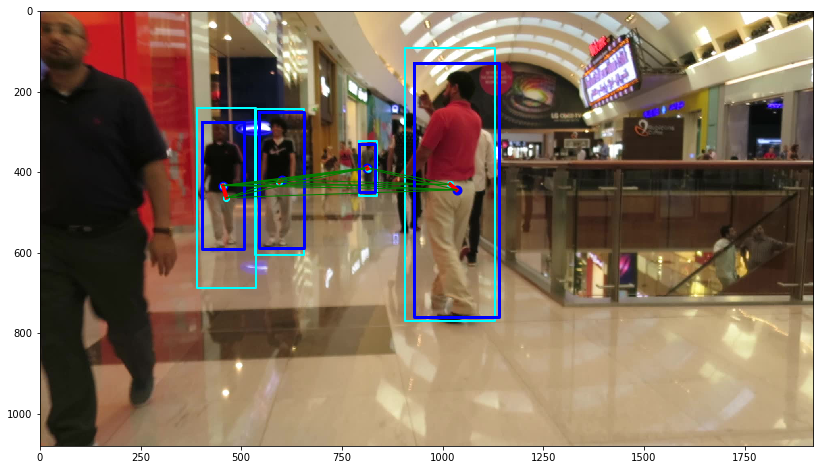

In [30]:
%matplotlib inline
import json
from pppr import aabb
from pprint import pprint
Settings = json.load(open('settings.txt'))
pprint(Settings)
import sys
sys.path.insert(0,'../')
from pak.datasets.MOT import MOT16
from pak import utils
import matplotlib.pyplot as plt
import numpy as np
from pak.evaluation import MOTA

root = Settings['data_root']

from experiments import MOT16_Experiments

mot16 = MOT16_Experiments(root)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

# --- SELECT THE RIGHT VIDEO ----
X  = mot16.mot16_11_X
Dt = mot16.mot16_11_true_detections_no_pid

E = np.loadtxt('edges.txt')

def find_cost(i, j, E):
    for a, b, ce in E:
        if int(a) == int(i) and int(b) == int(j):
            return ce
    assert False

indx_frame1 = []
indx_frame2 = []
for idx, dt in enumerate(Dt):
    if dt[0] == 1:
        indx_frame1.append(idx)
    elif dt[0] == 2:
        indx_frame2.append(idx)

        
def get_center(aabb):
    _, x,y,w,h,_ = aabb
    return (x+w/2, y+h/2)
        
for j in indx_frame2:
    frame2, x, y, w, h, _ = Dt[j]
    assert frame2 == 2
    bbX, bbY = utils.bb_to_plt_plot(x, y, w, h)
    ax.plot(bbX, bbY, linewidth=2, c='cyan')
        

for i in indx_frame1:
    frame1, x, y, w, h, score = Dt[i]
    bbX, bbY = utils.bb_to_plt_plot(x, y, w, h)
    ax.plot(bbX, bbY, linewidth=3, c='blue')
    c_i = get_center(Dt[i])
    ax.scatter(c_i[0], c_i[1], color='blue', s=80)
    assert frame1 == 1
    for j in indx_frame2:
        c_j = get_center(Dt[j])
        ax.scatter(c_j[0], c_j[1], color='cyan', s=30)
        
        ce = find_cost(i, j, E)
        color = 'green' if ce > 0 else 'red'
        lw = 1 if ce > 0 else 4
        ax.plot([c_i[0], c_j[0]], [c_i[1], c_j[1]], color=color, lw=lw)


ax.imshow(X[1])
plt.show()